In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [179]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'

In [180]:
df = pd.read_csv(data)

In [181]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


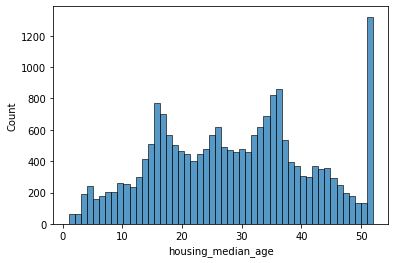

In [182]:
sns.histplot(df['housing_median_age'], bins=50)

# QUESTION 1
Find a feature with missing values. How many missing values does it have?

In [183]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## QUESTION 2
What's the median (50% percentile) for variable 'population'?

In [184]:
df.population.median()

1166.0

## SPLIT THE DATA
Shuffle the initial dataset, use seed 42.\
Split your data in train/val/test sets, with 60%/20%/20% distribution.\
Make sure that the target value ('median_house_value') is not in your dataframe.\
Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [185]:
n = len(df)
indx = np.arange(n)

In [186]:
#before shuffle
df.iloc[indx[:10]]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [187]:
#Shuffle the initial dataset, use seed 42
np.random.seed(42)
np.random.shuffle(indx)

In [188]:
df.iloc[indx[:10]]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN
13311,-117.61,34.08,12.0,4427.0,NaN,2400.0,843.0,4.7147,158700.0,INLAND
7113,-118.02,33.89,36.0,1375.0,NaN,670.0,221.0,5.0839,198200.0,<1H OCEAN
7668,-118.08,33.92,38.0,1335.0,NaN,1011.0,269.0,3.6908,157500.0,<1H OCEAN
18246,-122.08,37.39,4.0,2292.0,NaN,1050.0,584.0,4.8036,340000.0,NEAR BAY
5723,-118.23,34.18,45.0,2332.0,NaN,943.0,339.0,8.1132,446600.0,<1H OCEAN


In [189]:
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val -n_test

In [190]:
n, n_train + n_val + n_test

(20640, 20640)

In [191]:
n_train, n_val, n_test

(12384, 4128, 4128)

In [192]:
#Split your data in train/val/test sets, with 60%/20%/20% distribution.
df_train = df.iloc[indx[: n_train]]
df_val = df.iloc[indx[n_train : n_train + n_val]]
df_test = df.iloc[indx[n_train + n_val : ]]

In [193]:
df_train = df_train.reset_index(drop =True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [194]:
df_train[:10]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
1,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
2,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
3,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
4,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN
5,-117.61,34.08,12.0,4427.0,NaN,2400.0,843.0,4.7147,158700.0,INLAND
6,-118.02,33.89,36.0,1375.0,NaN,670.0,221.0,5.0839,198200.0,<1H OCEAN
7,-118.08,33.92,38.0,1335.0,NaN,1011.0,269.0,3.6908,157500.0,<1H OCEAN
8,-122.08,37.39,4.0,2292.0,NaN,1050.0,584.0,4.8036,340000.0,NEAR BAY
9,-118.23,34.18,45.0,2332.0,NaN,943.0,339.0,8.1132,446600.0,<1H OCEAN


In [196]:
#Apply the log transformation to the median_house_value variable using the np.log1p() function.
y_train = np.log1p(df_train['median_house_value'].values)
y_val = np.log1p(df_val['median_house_value'].values)
y_test =np.log1p(df_test['median_house_value'].values)

In [197]:
#delete 'median_house_value' variable
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [198]:
df_train[:10]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,INLAND
1,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,INLAND
2,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,NEAR BAY
3,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,<1H OCEAN
4,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,NEAR OCEAN
5,-117.61,34.08,12.0,4427.0,NaN,2400.0,843.0,4.7147,INLAND
6,-118.02,33.89,36.0,1375.0,NaN,670.0,221.0,5.0839,<1H OCEAN
7,-118.08,33.92,38.0,1335.0,NaN,1011.0,269.0,3.6908,<1H OCEAN
8,-122.08,37.39,4.0,2292.0,NaN,1050.0,584.0,4.8036,NEAR BAY
9,-118.23,34.18,45.0,2332.0,NaN,943.0,339.0,8.1132,<1H OCEAN


## Question 3

We need to deal with missing values for the column from Q1.\
We have two options: fill it with 0 or with the mean of this variable.\
Try both options. For each, train a linear regression model without regularization using the code from the lessons.\
For computing the mean, use the training only!\
Use the validation dataset to evaluate the models and compare the RMSE of each option.\
Round the RMSE scores to 2 decimal digits using round(score, 2)\
Which option gives better RMSE?

In [199]:
def train_linear_regression(X, y):
  ones = np.ones(X.shape[0])    #array of ones for bias term
  X = np.column_stack([ones, X])   #adding the ones as index 0 of X

  XTX = X.T.dot(X)             #X multiply X transpose
  XTX_inv = np.linalg.inv(XTX)       #inverse of XTX #gram matrix
  w_full = XTX_inv.dot(X.T).dot(y)

  return w_full[0], w_full[1:]

In [200]:
base = ['longitude',	'latitude',	'housing_median_age',	'total_rooms'	,'total_bedrooms', 'population',	'households',	'median_income']

In [201]:
def prepare_X(df,fill_val):
  df_num = df[base]
  df_num = df_num.fillna(fill_val)
  X = df_num.values
  return X

In [202]:
def rmse(y, y_pred):
  se = (y - y_pred) ** 2
  mse = se.mean()  
  return np.sqrt(mse)

With fill 0,

In [204]:
#training set
X_train_zero = prepare_X(df_train, 0)
w0_zero, w_zero = train_linear_regression(X_train_zero, y_train)

#validation set
X_val_zero = prepare_X(df_val, 0)
y_pred_zero = w0_zero + X_val_zero.dot(w_zero)

#RMSE
rmse_zero = rmse(y_val, y_pred_zero)
np.round(rmse_zero, 2)

0.33

With mean value,

In [205]:
mean = df_train['total_bedrooms'].mean()

#training set
X_train_mean = prepare_X(df_train, mean)
w0_mean, w_mean = train_linear_regression(X_train_mean, y_train)

#validation set
X_val_mean = prepare_X(df_val, mean)
y_pred_mean = w0_mean + X_val_mean.dot(w_mean)

#RMSE
rmse_mean = rmse(y_val, y_pred_mean)
np.round(rmse_mean, 2)

0.33

# QUESTION 4

Now let's train a regularized linear regression.\
For this question, fill the NAs with 0.\
Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].\
Use RMSE to evaluate the model on the validation dataset.\
Round the RMSE scores to 2 decimal digits.\
Which r gives the best RMSE?\
If there are multiple options, select the smallest r.

In [212]:
def train_linear_regression_reg(X, y, r=0.001):
  ones = np.ones(X.shape[0])    
  X = np.column_stack([ones, X])   

  XTX = X.T.dot(X)            
  XTX = XTX + r * np.eye(XTX.shape[0])    

  XTX_inv = np.linalg.inv(XTX)       
  w_full = XTX_inv.dot(X.T).dot(y)

  return w_full[0], w_full[1:]

In [214]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
  w0_reg, w_reg = train_linear_regression_reg(X_train_zero, y_train, r =r)

  X_val_zero = prepare_X(df_val, 0)
  y_pred_zero = w0_reg + X_val_zero.dot(w_reg)

  rmse_score = rmse(y_val, y_pred_zero)
  rounded_score = np.round(rmse_score, 2)

  print(r, w0_reg, rounded_score)

0 -11.686975242036546 0.33
1e-06 -11.686959175728921 0.33
0.0001 -11.685368865034667 0.33
0.001 -11.670931317799797 0.33
0.01 -11.528493585632091 0.33
0.1 -10.274500282195673 0.33
1 -4.920480897742212 0.33
5 -1.482095745621172 0.34
10 -0.7899311831779245 0.34


## QUESTION 5

We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.\
Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].\
For each seed, do the train/validation/test split with 60%/20%/20% distribution.\
Fill the missing values with 0 and train a model without regularization.\
For each seed, evaluate the model on the validation dataset and collect the RMSE scores.\
What's the standard deviation of all the scores? To compute the standard deviation, use np.std.\
Round the result to 3 decimal digits (round(std, 3))\
Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

In [217]:
rmse_list = []

for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:

  np.random.seed(s)
  np.random.shuffle(indx)

  n_val = int(n * 0.2)
  n_test = int(n * 0.2)
  n_train = n - n_val -n_test

  #Split your data in train/val/test sets, with 60%/20%/20% distribution.
  df_train = df.iloc[indx[: n_train]]
  df_val = df.iloc[indx[n_train : n_train + n_val]]
  df_test = df.iloc[indx[n_train + n_val : ]]

  #Apply the log transformation to the median_house_value variable using the np.log1p() function.
  y_train = np.log1p(df_train['median_house_value'].values)
  y_val = np.log1p(df_val['median_house_value'].values)
  y_test =np.log1p(df_test['median_house_value'].values)

  del df_train['median_house_value']
  del df_val['median_house_value']
  del df_test['median_house_value']

  #training set
  X_train_zero = prepare_X(df_train, 0)
  w0_zero, w_zero = train_linear_regression(X_train_zero, y_train)

  #validation set
  X_val_zero = prepare_X(df_val, 0)
  y_pred_zero = w0_zero + X_val_zero.dot(w_zero)

  #RMSE
  rmse_zero = rmse(y_val, y_pred_zero)
  rmse_list.append(rmse_zero) 

rmse_list

[0.3471332864361601,
 0.33755578744755366,
 0.34221569079734615,
 0.3415344544791566,
 0.34451363462196666,
 0.33532235322323206,
 0.34169862135357465,
 0.3423978080565192,
 0.33443726480391495,
 0.3375691470981091]

In [220]:
std = np.std(rmse_list)
rounded_std = np.round(std, 3)
rounded_std

0.004

## QUESTION 6

Split the dataset like previously, use seed 9.\
Combine train and validation datasets.\
Fill the missing values with 0 and train a model with r=0.001.\
What's the RMSE on the test dataset?

In [223]:
indx = np.arange(n)
np.random.seed(9)
np.random.shuffle(indx)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val -n_test

  #Split your data in train/val/test sets, with 60%/20%/20% distribution.
df_train = df.iloc[indx[: n_train]]
df_val = df.iloc[indx[n_train : n_train + n_val]]
df_test = df.iloc[indx[n_train + n_val : ]]

#Combine train and validation datasets.
frames = [df_train, df_val]
df_combi = pd.concat(frames)

df_combi = df_combi.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

  #Apply the log transformation to the median_house_value variable using the np.log1p() function.
y_combi = np.log1p(df_combi['median_house_value'].values)
y_test =np.log1p(df_test['median_house_value'].values)

del df_combi['median_house_value']
del df_test['median_house_value']



In [228]:
X_combi = prepare_X(df_combi, 0)
w0_combi, w_combi = train_linear_regression_reg(X_combi, y_combi, r=0.001)

#test set
X_test = prepare_X(df_test, 0)
y_pred_test = w0_combi + X_test.dot(w_combi)

In [229]:
np.round(rmse(y_test, y_pred_test), 2)

0.35